<a href="https://colab.research.google.com/github/maximmillion/ConvCancer/blob/main/Image_Classification_XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification using XGBOOST

In [1]:
### getting the tools ready
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 1. Gather and process the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
### loading the data from stored device
dataDict = {'label':[], 
            'image': []}
dataPath = '/content/drive/MyDrive/cancer_dataG'
labels = os.listdir(dataPath)
for label in labels:
  localPath = os.path.join(dataPath, label)
  print(localPath)
  imagesInPath = os.listdir(localPath)
  for imagePath in imagesInPath:
    imgPath = os.path.join(localPath, imagePath)
    dataDict['label'].append(label[:-4])
    dataDict['image'].append(imgPath)


/content/drive/MyDrive/cancer_dataG/stage_3_png
/content/drive/MyDrive/cancer_dataG/stage_2_png
/content/drive/MyDrive/cancer_dataG/stage_1_png


In [4]:
data = pd.DataFrame(dataDict)

In [5]:
data.head()

,label,image
0,stage_3,/content/drive/MyDrive/cancer_dataG/stage_3_pn...
1,stage_3,/content/drive/MyDrive/cancer_dataG/stage_3_pn...
2,stage_3,/content/drive/MyDrive/cancer_dataG/stage_3_pn...
3,stage_3,/content/drive/MyDrive/cancer_dataG/stage_3_pn...
4,stage_3,/content/drive/MyDrive/cancer_dataG/stage_3_pn...


In [6]:
### is the data balanced?
data['label'].value_counts()

stage_3    250
stage_2    250
stage_1    250
Name: label, dtype: int64

In [7]:
all_imgs = []
for image_path in data['image']:
  # opencv opens the image into bgr format (blue, green, red)
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  image = cv2.resize(image, (124, 124))
  image = image.flatten()
  all_imgs.append(image)
  # plt opens the image in rgb format (red, green, blue)
  # img = plt.imread(image_path)
  # print('matplotlib image', img.shape)
  # print('opencv image', image.shape)

In [8]:
data

,label,image
0,stage_3,/content/drive/MyDrive/cancer_dataG/stage_3_pn...
1,stage_3,/content/drive/MyDrive/cancer_dataG/stage_3_pn...
2,stage_3,/content/drive/MyDrive/cancer_dataG/stage_3_pn...
3,stage_3,/content/drive/MyDrive/cancer_dataG/stage_3_pn...
4,stage_3,/content/drive/MyDrive/cancer_dataG/stage_3_pn...
...,...,...
745,stage_1,/content/drive/MyDrive/cancer_dataG/stage_1_pn...
746,stage_1,/content/drive/MyDrive/cancer_dataG/stage_1_pn...
747,stage_1,/content/drive/MyDrive/cancer_dataG/stage_1_pn...
748,stage_1,/content/drive/MyDrive/cancer_dataG/stage_1_pn...


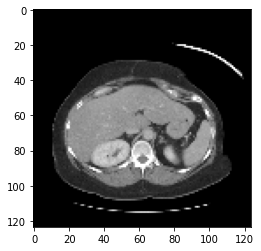

In [9]:

plt.imshow(all_imgs[3].reshape(124, 124), cmap='gray')

#### spliting the data in X and y

In [10]:
X = np.array(all_imgs)
y = data['label']

#### Todo:


1.   Enocode the labels to numerical values
2.   Noramlize the data in X



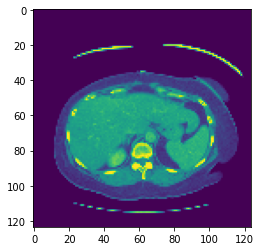

In [11]:
plt.imshow(X[2].reshape(124, 124))

In [12]:
### Enocode the labels to numerical values0
### ['stage_1', 'stage_2', 'stage_3']
### using .cat.codes
y_encoded = y.astype('category').cat.codes
classes = ['stage_1', 'stage_2', 'stage_3']

In [13]:
y_encoded

0      2
1      2
2      2
3      2
4      2
      ..
745    0
746    0
747    0
748    0
749    0
Length: 750, dtype: int8

In [14]:
### data normalization
X_norm = X/255

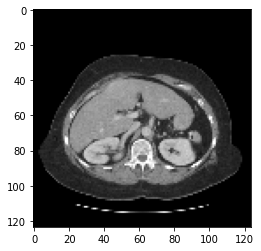

In [15]:
plt.imshow(X[10].reshape(124, 124), cmap='gray')

### 2. Modeling

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
### split into train test
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_encoded, test_size=0.2, random_state=0, stratify=y_encoded)

In [18]:
X_train.shape

(600, 15376)

In [19]:
y_train.value_counts()

2    200
1    200
0    200
dtype: int64

In [20]:
y_test.value_counts()

2    50
1    50
0    50
dtype: int64

In [21]:
import xgboost

In [22]:
### instanciate the model
xgb = xgboost.XGBClassifier()

In [23]:
### fit the model (training)
xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [24]:
### simple evaluation (accuracy)
xgb.score(X_test, y_test)

1.0

##### Detailed Evaluation

In [25]:
preds = xgb.predict(X_test)

In [26]:
### classification report
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



Prediction =  stage_3


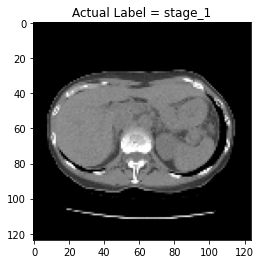

In [28]:
#### lets take an image from test
print('Prediction = ', classes[preds[0]])
plt.imshow(X_test[3].reshape(124, 124), cmap='gray')
plt.title(f'Actual Label = {classes[y_test.iloc[3]]}')
plt.show()

